### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys

In [2]:
%matplotlib inline

## **How a Computer sees an Image**

A computer doesn't have vision as humans do. It stores an image as digital data by encoding each pixel in the image as a combination of digital representation of the basic colors in the color model. The most popular color model is `RGB`, although `OpenCV` uses `BGR` color model.

<img src="./imgs/rgb_color_model.png" height=300 width=600>

The `RGB` color model is also known as `24 bit color (3 channels x 8 bits per channel)`.

`Grayscale images are usually 8 bits`, with `0 representing pure black and 255 representing pure white.` The values in between represents some shade of gray. *There are some functions and libraries that only takes grayscale images.*

<img src="./imgs/how_computer_sees_an_image.png" height=250 width=500> <img src='https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/array.png?token=ADLZD2HNEL33JAKTYRM3B5C7WMIV4' height=250 width=350>

**`Important Note:`** In **`Numpy`** the color information is stored in the columns i.e, along the x axis of the array (z, y, x). So in numpy the shape of an image would be represented as, **`(height, width, 3)`**. But, **`historically`** image dimensions have been reffered to by its height value and is represented as **`(width, height)`**. So for example a 480p image has dimensions (width, height) = (640, 480) pixels. OpenCV also uses this convention.

## **How OpenCV stores an Image (The Mat Object)**

OpenCV uses the `BGR` color model to store images and images are stored as `Mat` (for python, that's `np.ndarray`) objects.

`Mat` is basically a class with two data parts: the `matrix header` (containing information such as the size of the matrix, the method used for storing, at which address is the matrix stored, and so on) and a `pointer` to the matrix containing the pixel values (taking any dimensionality depending on the method chosen for storing) . 

*The matrix header size is constant, however the size of the matrix itself may vary from image to image and usually is larger by orders of magnitude.*

Each Mat object has its own header, however a matrix may be shared between two Mat objects by having their matrix pointers point to the same address.

`The assignment operator will only copy the headers and the pointer to the large matrix, not the data itself.` So, making a modification using any of the copies (made using = operator) will affect all the other ones as well.

Also, copying only a part of the data to other Mat objects, in practice just provides different access methods to the same underlying data. Nevertheless, their header parts are different. 

But, to copy the matrix itself too, use `.copy()` or even better, `copy.deepcopy()` functions.

## **Getting Started with Images ([Docs](https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html))**

- ### Reading an Image

To read an image in opencv we use, `cv.imread(filename, flags)`.

<u>Parameters</u>
- filename: Name of file to be loaded.
- flags: Flag that can take values of [cv.ImreadModes](href=https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822)

In [3]:
img = cv.imread("./imgs/cherry_blossom.jpeg")

# print sys.exit statement if the image couldn't be read
# this is done as usually opencv will only give an warning and not an error

if img is None:
    sys.exit("Couldn't read the image")

In [4]:
# type of the image
type(img)

numpy.ndarray

> The dimensions of an Image

In [5]:
img_dim = img.shape
print(
    "Height of the image is {} pixels.\nWidth of the image is {} pixels.\nAnd, depth of the image is {} which represents the no of color components in the color code.".format(
        img_dim[0], img_dim[1], img_dim[2]
    )
)

Height of the image is 810 pixels.
Width of the image is 1080 pixels.
And, depth of the image is 3 which represents the no of color components in the color code.


#### *Color Space Conversion* ([Source: ChatGPT](https://chat.openai.com/share/a70b7da3-e745-4e8d-b1b5-a7b789ea2080))

In OpenCV, a color space is a specific way of representing colors in an image. Different color spaces have different characteristics and are suited for various image processing tasks. Some of the commonly used color spaces in OpenCV include RGB, HSV, LAB, and YUV.

Color space conversion is the process of converting an image from one color space to another. OpenCV provides functions to perform color space conversions, allowing you to switch between different color representations depending on the requirements of your image processing tasks.

Various image processing techniques works better in a particular color representations than others. While there isn't a definitive "one-size-fits-all" rule, here are some general guidelines and use cases for popular color spaces to help you make a decision:

1. RGB (Red, Green, Blue):
   - Commonly used for general image display and visualization.
   - Suitable for tasks related to digital photography, computer graphics, and displaying images on screens.
   - May not be ideal for certain computer vision tasks that require color-based segmentation or color information analysis.

2. HSV (Hue, Saturation, Value):
   - Well-suited for tasks involving color segmentation and object detection based on color range.
   - Helpful in scenarios where you want to filter specific colors or isolate regions with certain hues.
   - Useful for tasks related to tracking objects with distinct colors in real-time applications.

3. LAB (Lightness, A channel, B channel):
   - Particularly useful for color-based image segmentation and object detection.
   - Suitable for tasks that require uniform color perception, as the L channel (Lightness) approximates human perception of brightness.
   - Often used in color-related computer vision algorithms.

4. YUV (Luminance, Chrominance U, Chrominance V):
   - Widely used in video compression and transmission.
   - Can be useful for separating image luminance information from color information.
   - Used in some video processing applications, but less commonly utilized in other computer vision tasks.

While these guidelines can be helpful, it's essential to understand the nature of your specific image processing task and experiment with different color spaces to see which one yields the best results for your particular use case.

> For **`color space conversion`**, we can use `cv.cvtColor(input_image, flag)` where, `flag` determines the type of conversion (depending on the defined color space conversion code). See [Color Space Conversion Codes](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

##### The HSV color space

The HSV colorspace has 3 components, `Hue (type of color): 0 - 360, Saturation (intensity / color depth): 0 - 1, Value (brightness): 0 - 1.`

<img src="./imgs/hsv_color_space.jpeg" height=300 width=600)> <img src="./imgs/hsv_cone.png" height=300 width=300)>


In image processing and computer vision, the HSV color model is a representation of colors using three components: H (Hue), S (Saturation), and V (Value). The HSV color model is designed to be more intuitive and easy to work with compared to the traditional RGB (Red, Green, Blue) color model.

1. **Hue** (H):
Hue represents the **type of color** or the dominant wavelength of light in the image. It is measured as an angle on the color wheel, ranging from 0 to 360 degrees. The hues 0 and 360 both correspond to red, while the other hues are distributed around the wheel to cover all the different colors of the spectrum. For example, green is around 120 degrees, and blue is around 240 degrees.

2. **Saturation** (S):
Saturation measures the **intensity or purity of the color**. A value of 0 means the color is fully desaturated, resulting in a grayscale image (no color). As the value of S increases, the color becomes more vibrant and saturated. At its maximum (S = 1), the color is fully saturated and has its purest form. You can also think of saturation as the parameter that defines the **shade** of a color. The more the saturation, the **more deep** the color will look. It can also be thought as the **strength** of a color.

3. **Value** (V):
Value represents the **brightness or lightness** of the color. A value of 0 means the color is completely black, regardless of the hue and saturation values. As the value of V increases, the color becomes brighter. At its maximum (V = 1), the color is at its full brightness.

Using the HSV color model, one can manipulate the individual components to change the color appearance of an image, perform color segmentation, or extract specific color ranges for further analysis. It is a popular choice in various computer vision applications due to its simplicity and natural representation of color perception.

**`Note:` In OpenCV, the `S and V` values ranges between `0-255` due to `8 bit` representation.**

- ### Displaying an Image

##### *Using `cv.imshow(winname, mat)`*

This command will create a new window and display the image in that window.

In [6]:
# cv.imshow("cherry blossom", img)

# # wait until user quits (pressing any key will quit the window)
# k = cv.waitKey(0)

# # to save the image in a new file if user input is "s"
# if k == ord("s"):
#     cv.imwrite("./imgs/starry_night.png", img)

##### *Using matplotlib*

Sometimes we will use `matplotlib.pyplot.imshow()` function instead of `cv.imshow()`. This is for a number of reasons.
1. cv.imshow() creates a new window for each image to be shown. Most of the times, when we are using notebooks instead of python scripts, we want to see the image inline.
2. also, with matplotlib we can plot multiple images as different axes (subplots) in the same figure. 

There is a little caveat though. OpenCV uses BGR color model. And Matplotlib reflects this in its output. So, first we will need to convert the color model of the 'mat' to RGB in order to properly display it using matplotlib.

**`->`** Here is a custom function to show images with matplotlib. The main function doing the plotting is, `plt.imshow()`. This function just wraps some other operations around it.

In [7]:
# converting color mode to RGB and displaying the image as matplotlib figure
def matplotlib_imshow(
    img_title="", img=None, fig_h=5, cv_colorspace_conversion_flag=cv.COLOR_BGR2RGB
):
    """
    matplotlib_imshow(img_title="", img=None, fig_h=5, cv_colorspace_conversion_flag=cv.COLOR_BGR2RGB)
    """

    # tinkering with size
    try:
        img_height, img_width = img.shape[0], img.shape[1]
        aspect_ratio = img_width / img_height
        plt.figure(figsize=(fig_h, fig_h * aspect_ratio))
    except AttributeError:
        print(
            "None Type image. Correct_syntax is, matplotlib_imshow(img_title, img, fig_h, cv_colorspace_conversion_flag)."
        )

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(img, cv_colorspace_conversion_flag))
    plt.title(img_title)
    plt.show()

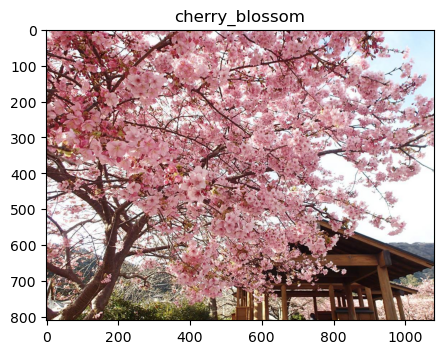

In [8]:
matplotlib_imshow("cherry_blossom", img)

- ### Saving an Image

To save an image in opencv we use, `cv.imwrite(filename, img, flags)`.

<u>Parameters</u>
- filename: Name of the file.
- img (Mat or vector of Mat): Image or Images to be saved.
- params: Format-specific parameters encoded as pairs (paramId_1, paramValue_1, paramId_2, paramValue_2, ... .) see [cv.ImwriteFlags](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac).



In [9]:
# let's first convert the image to greyscale using color space conversion and then we will save it

img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # no it's not wrong, grey is uk spelling
cv.imwrite("./imgs/cherry_blossom_grey.png", img_grey)

True